In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
# load dataset
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)


In [21]:
trainX

array([[[[0.6666667 , 0.7058824 , 0.7764706 ],
         [0.65882355, 0.69803923, 0.76862746],
         [0.69411767, 0.7254902 , 0.79607844],
         ...,
         [0.63529414, 0.7019608 , 0.84313726],
         [0.61960787, 0.69803923, 0.8392157 ],
         [0.6156863 , 0.69411767, 0.83137256]],

        [[0.65882355, 0.70980394, 0.7764706 ],
         [0.6745098 , 0.7254902 , 0.7882353 ],
         [0.67058825, 0.7176471 , 0.78431374],
         ...,
         [0.62352943, 0.69411767, 0.83137256],
         [0.6117647 , 0.6901961 , 0.827451  ],
         [0.6039216 , 0.68235296, 0.81960785]],

        [[0.6039216 , 0.6666667 , 0.7294118 ],
         [0.58431375, 0.64705884, 0.70980394],
         [0.5058824 , 0.5647059 , 0.63529414],
         ...,
         [0.6313726 , 0.69803923, 0.8392157 ],
         [0.6156863 , 0.69411767, 0.83137256],
         [0.6039216 , 0.68235296, 0.81960785]],

        ...,

        [[0.2901961 , 0.32941177, 0.3137255 ],
         [0.29803923, 0.33333334, 0.31764707]

In [3]:
trainy

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
selected_classes = [0, 1, 2, 3]

train_filter = np.isin(trainy, selected_classes).flatten()

trainX = trainX[train_filter]  
trainy = trainy[train_filter]  

In [5]:
trainy

array([[1],
       [1],
       [2],
       ...,
       [2],
       [1],
       [1]], dtype=uint8)

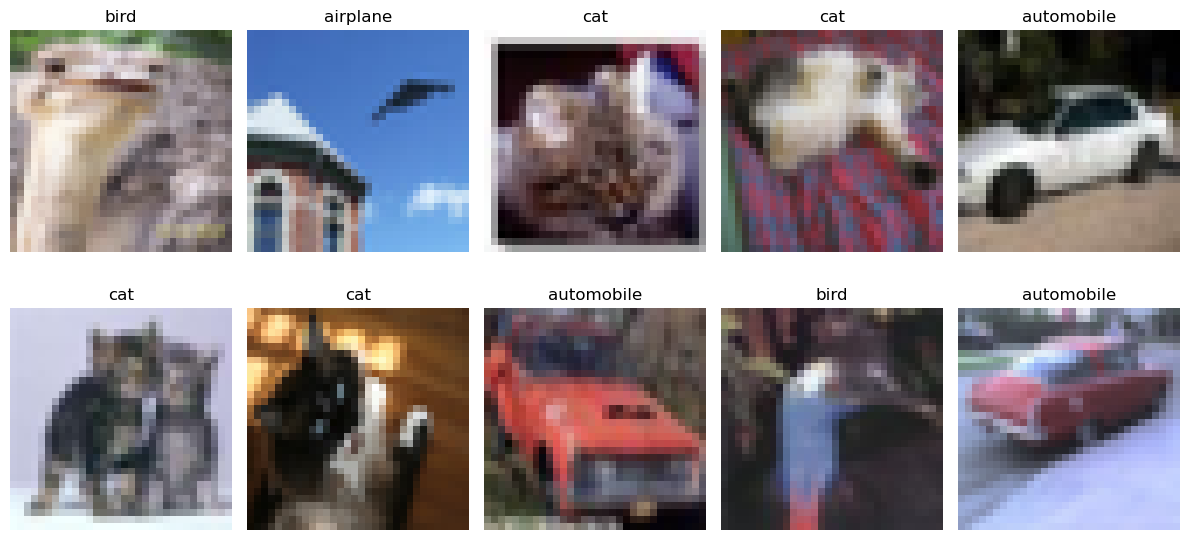

In [6]:
import random

from matplotlib import pyplot as plt


num_samples = 10
random_indices = random.sample(range(len(trainX)), num_samples)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1) 
    plt.imshow(trainX[idx]) 
    label = label_names[trainy[idx][0]]  
    plt.title(label)  
    plt.axis('off')  

plt.tight_layout()
plt.show()

In [7]:
trainX = trainX.astype('float32') / 255.0

print("Min pixel value:",trainX.min())
print("Max pixel value:", trainX.max())

Min pixel value: 0.0
Max pixel value: 1.0


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_samples = trainX.shape[0]
flattened_data = trainX.reshape(num_samples, -1) 


pca = PCA(n_components=2)
pca_data = pca.fit_transform(flattened_data)


In [9]:
pca_data[0]

array([-3.9960995, -4.405558 ], dtype=float32)

In [10]:
import pandas as pd

# Create a DataFrame
pca_df = pd.DataFrame({
    "PC1": pca_data[:, 0], 
    "PC2": pca_data[:, 1], 
    "label": trainy.flatten()  
})



In [11]:
pca_df

,PC1,PC2,label
0,-3.996099,-4.405558,1
1,-7.161005,-4.105941,1
2,-1.022542,-1.163919,2
3,-8.857743,-6.925660,3
4,-12.250117,7.167267,2
...,...,...,...
19995,-0.432117,-2.455275,1
19996,6.232322,0.266625,0
19997,5.554255,-7.044425,2
19998,10.148026,-5.149054,1


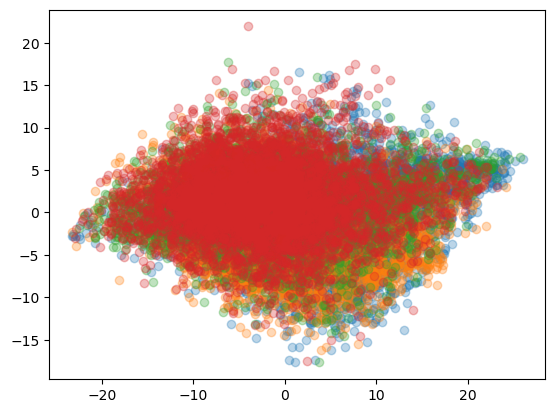

In [12]:
selected_class_names = ["airplane", "automobile", "bird", "cat"]

for i, class_name in enumerate(selected_class_names):
    class_data = pca_df[pca_df["label"] == i]
    plt.scatter(class_data["PC1"], class_data["PC2"], label=class_name, alpha=0.3)

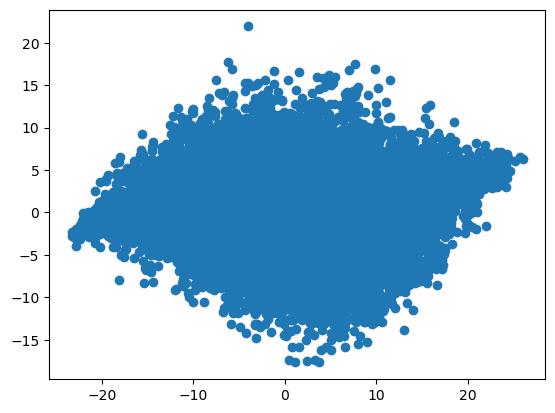

In [13]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.show()


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Standard K-means
kmeans_standard = KMeans(n_clusters=4, random_state=42)
kmeans_standard_labels = kmeans_standard.fit_predict(flattened_data)

# K-means with PCA (95% variance)
pca_95 = PCA(n_components=0.95)  # Retain 95% variance
data_pca = pca_95.fit_transform(flattened_data)
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(data_pca)

# K-means with LDA (3 components)
lda = LDA(n_components=3)
data_lda = lda.fit_transform(flattened_data,trainy.flatten())
kmeans_lda = KMeans(n_clusters=4, random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(data_lda)


In [15]:
kmeans_pca_labels

array([0, 3, 1, ..., 0, 2, 0])

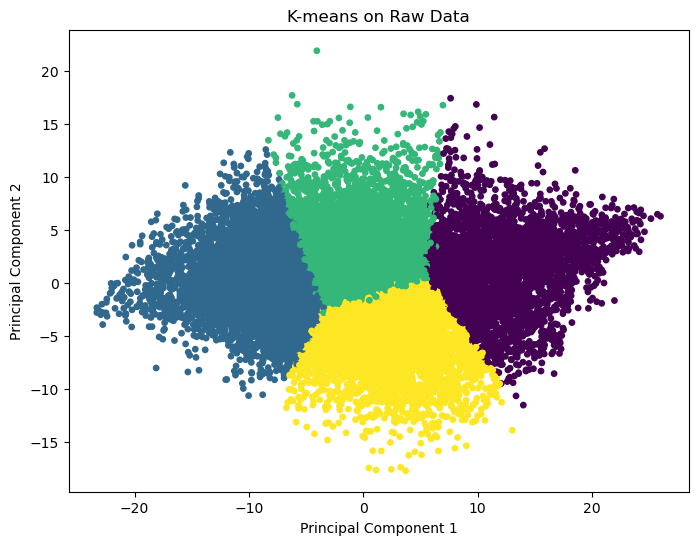

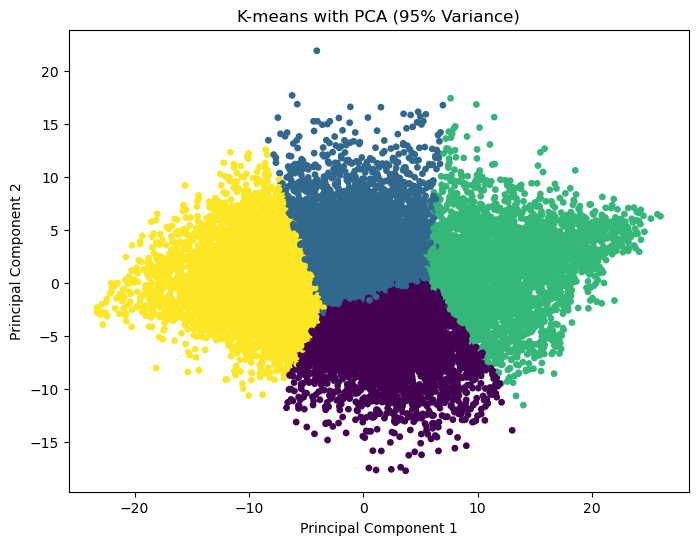

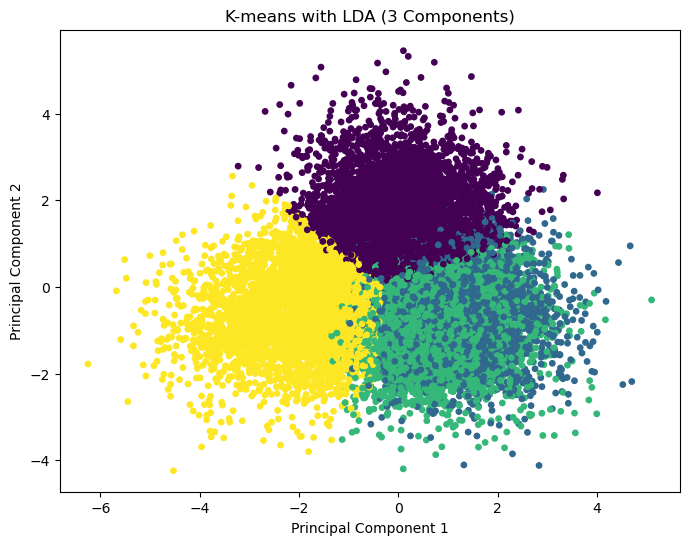

In [16]:
import matplotlib.pyplot as plt

def visualize_clusters(data, labels, title):
    pca_2d = PCA(n_components=2) 
    data_2d = pca_2d.fit_transform(data)
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=15)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
  
    plt.show()

# Visualize results
visualize_clusters(flattened_data, kmeans_standard_labels, "K-means on Raw Data")
visualize_clusters(data_pca, kmeans_pca_labels, "K-means with PCA (95% Variance)")
visualize_clusters(data_lda, kmeans_lda_labels, "K-means with LDA (3 Components)")


In [17]:
db_score_standard = davies_bouldin_score(flattened_data, kmeans_standard_labels)
db_score_pca = davies_bouldin_score(data_pca, kmeans_pca_labels)
db_score_lda = davies_bouldin_score(data_lda, kmeans_lda_labels)

print("Davies-Bouldin Scores:")
print(f"K-means on Raw Data: {db_score_standard}")
print(f"K-means with PCA (95%): {db_score_pca}")
print(f"K-means with LDA (3 components): {db_score_lda}")

Davies-Bouldin Scores:
K-means on Raw Data: 2.452368156221779
K-means with PCA (95%): 2.3578427346232136
K-means with LDA (3 components): 1.0626618998045652


In [18]:

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode

aligned_labels = np.zeros_like(kmeans_standard_labels)


for cluster in np.unique(kmeans_standard_labels):
    mask = (kmeans_standard_labels == cluster)  
    aligned_labels[mask] = mode(trainy[mask]).mode[0]  

print("Confusion Matrix (k-means):\n", confusion_matrix(trainy, aligned_labels))
print("\nClassification Report (k-means):\n", classification_report(trainy, aligned_labels))


Confusion Matrix (k-means):
 [[1802 1438    0 1760]
 [ 566 1647    0 2787]
 [ 824  681    0 3495]
 [ 608  714    0 3678]]

Classification Report (k-means):
               precision    recall  f1-score   support

           0       0.47      0.36      0.41      5000
           1       0.37      0.33      0.35      5000
           2       0.00      0.00      0.00      5000
           3       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000



c:\Users\ASUS\miniconda3\envs\datathon-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\miniconda3\envs\datathon-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\miniconda3\envs\datathon-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [19]:

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode

aligned_labels = np.zeros_like(kmeans_pca_labels)


for cluster in np.unique(kmeans_pca_labels):
    mask = (kmeans_pca_labels == cluster)  
    aligned_labels[mask] = mode(trainy[mask]).mode[0]  

print("Confusion Matrix (k-means-PLA):\n", confusion_matrix(trainy, aligned_labels))
print("\nClassification Report (k-means-PLA):\n", classification_report(trainy, aligned_labels))

Confusion Matrix (k-means-PLA):
 [[1802 1436    0 1762]
 [ 566 1646    0 2788]
 [ 825  678    0 3497]
 [ 609  713    0 3678]]

Classification Report (k-means-PLA):
               precision    recall  f1-score   support

           0       0.47      0.36      0.41      5000
           1       0.37      0.33      0.35      5000
           2       0.00      0.00      0.00      5000
           3       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000



c:\Users\ASUS\miniconda3\envs\datathon-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\miniconda3\envs\datathon-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\miniconda3\envs\datathon-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode

aligned_labels = np.zeros_like(kmeans_lda_labels)


for cluster in np.unique(kmeans_lda_labels):
    mask = (kmeans_lda_labels == cluster)  
    aligned_labels[mask] = mode(trainy[mask]).mode[0]  

print("Confusion Matrix (k-means-LDA):\n", confusion_matrix(trainy, aligned_labels))
print("\nClassification Report (k-means-LDA):\n", classification_report(trainy, aligned_labels))

Confusion Matrix (k-means-LDA):
 [[3977  290  270  463]
 [ 525 3737  241  497]
 [ 697  207 3121  975]
 [ 380  306  636 3678]]

Classification Report (k-means-LDA):
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      5000
           1       0.82      0.75      0.78      5000
           2       0.73      0.62      0.67      5000
           3       0.66      0.74      0.69      5000

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000

